## 필수과제 : mpg 데이터로 배운 문법을 한 번 이상 복습하기

스스로 mpg 데이터를 통해 질문을 하고 답을 찾는 코드를 작성하기, 주석처리 필수!

1. 너무 쉬운 질문의 답변 코드는 제외( 최소 2개 이상 조건이 들어가야 함)
2. 질문 수는 최소 15개 이상으로 진행
- audi a4의 평균 연비는 몇?
- midsize의 가장 연비가 좋은 차는?
- model별로 가장 도시연비가 좋은 차는?  
- 복합연비 (cty, hwy) 합의 평균


In [ ]:
import pandas as pd

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 5기/data/mpg.csv')

In [ ]:
mpg 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## 질문 & 답

### 1. 구동방식 중 f의 고속도로 연비 평균은?

In [ ]:
# 구동방식(drv)별 종류와 개수
mpg.groupby('drv').agg(n = ('drv', 'count'))
# f는 106개

,n
drv,
4,103
f,106
r,25


In [ ]:
# drv = f인 행만 추출해서 데이터프레임으로 저장
mpg_drv_f = mpg.query('drv == "f"')
mpg_drv_f

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# 구동방식이 f인 고속도로 연비 평균
mpg_drv_f['hwy'].mean()

28.160377358490567

답 : 28.160

### 2. 복합연비가 좋은 상위 3행은?

In [ ]:
# 복합연비 파생변수 만들기
mpg['total'] = mpg['cty'] + mpg['hwy']
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,42
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,44


In [ ]:
# 내림차순 정렬
mpg.sort_values('total', ascending = False)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,65
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,61
...,...,...,...,...,...,...,...,...,...,...,...,...
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,21
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,21
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,21
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,21


답 : 221, 212, 222행

### 3. 복합연비 평균이 높은 자동차 제조사 3곳은?

In [ ]:
# 자동차 제조사별 total(복합연비) 평균 추출
mpg_3 = mpg.groupby('manufacturer').agg(mean_total = ('total','mean'))
mpg_3

,mean_total
manufacturer,
audi,44.055556
chevrolet,36.894737
dodge,31.081081
ford,33.360000
honda,57.000000
hyundai,45.500000
jeep,31.125000
land rover,28.000000
lincoln,28.333333


In [ ]:
# 내림차순 정렬
mpg_3.sort_values('mean_total', ascending = False)

,mean_total
manufacturer,
honda,57.000000
volkswagen,50.148148
hyundai,45.500000
subaru,44.857143
audi,44.055556
toyota,43.441176
pontiac,43.400000
nissan,42.692308
chevrolet,36.894737


답 : honda, volkswagen, hyundai

### 4. compact 중 도시연비가 가장 좋은 자동차 제조사는?

In [ ]:
# category가 compact인 행 추출
mpg_4 = mpg.query('category == "compact"')
mpg_4

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,44
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,45
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,44
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,41
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,48


In [ ]:
# cty 기준으로 내림차순 정렬
mpg_4.sort_values('cty', ascending = False)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,65
195,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,61
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,61
194,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact,57
193,toyota,corolla,1.8,1999,4,auto(l3),f,24,30,r,compact,54
189,toyota,camry solara,2.4,2008,4,auto(s5),f,22,31,r,compact,53
215,volkswagen,jetta,2.0,2008,4,auto(s6),f,22,29,p,compact,51
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact,51
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact,50


답 : volkswagen

### 5. audi의 배기량 평균은?

In [ ]:
# manufacturer = audi인 데이터 추출
mpg_5 = mpg.query('manufacturer == "audi"')
mpg_5

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,44
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,45
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,44
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,41
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,48


In [ ]:
mpg_5['displ'].mean()

2.5444444444444447

답 : 2.54

### 6. 제조년도가 2008년인 자동차의 개수와 복합연비 평균은?

In [ ]:
# 제조년도 = 2008년인 데이터 추출
mpg_6 = mpg.query('year == 2008')
mpg_6
# 총 117개

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,45
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,48
10,audi,a4 quattro,2.0,2008,4,auto(s6),4,19,27,p,compact,46
...,...,...,...,...,...,...,...,...,...,...,...,...
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,48
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,49
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50


In [ ]:
# 복합연비 평균 구하기
mpg_6['total'].mean()

40.15384615384615

답 : 117개, 40.154

### 7. total 변수 시각화 후 grade 파생변수 만들기

In [ ]:
# total 변수 개수
mpg['total'].value_counts()

44    19
30    17
50    14
31    13
45    12
47    11
42    10
41    10
26    10
34     9
32     8
39     8
28     7
46     6
48     6
36     6
52     6
21     5
43     5
40     5
51     5
33     5
38     4
61     4
35     3
37     3
29     3
27     3
25     2
54     2
57     2
60     2
56     2
55     1
53     1
65     1
77     1
79     1
70     1
49     1
Name: total, dtype: int64

In [ ]:
import numpy as np

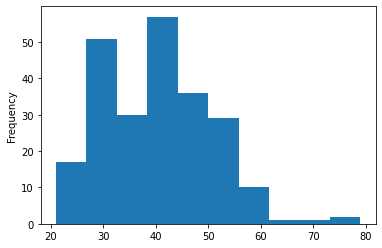

In [ ]:
# total 변수 시각화
mpg['total'].plot.hist()

In [ ]:
# total이 45 이상이면 good, 45 이하면 bad
mpg['grade'] = np.where(mpg['total'] >= 45, 'good', 'bad')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,good
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,good
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,good
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,good
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,bad


In [ ]:
# good, bad 변수 개수
mpg['grade'].value_counts()

bad     155
good     79
Name: grade, dtype: int64

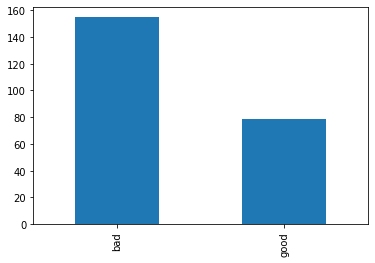

In [ ]:
# grade 변수 시각화
grade_count = mpg['grade'].value_counts()
grade_count.plot.bar()

### 8. 자동차 제조사별 good의 개수는? 1위 구하기

In [ ]:
# grade가 good인 데이터 추출
mpg_8 = mpg.query('grade == "good"')
mpg_8

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,good
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,good
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,good
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,good
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,45,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,49,good
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,50,good
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,47,good
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47,good


In [ ]:
# mpg_8을 자동차 제조사별로 묶고 개수 구하기
mpg_8.groupby('manufacturer').agg(n = ('grade', 'count'))

,n
manufacturer,
audi,7
chevrolet,3
honda,9
hyundai,8
nissan,6
pontiac,1
subaru,9
toyota,15
volkswagen,21


답 : 1위는 volkswagen = good 개수 21개

### 9. grade가 good인 도시연비 평균은?

In [ ]:
# 8번과 데이터 같음
mpg_8['cty'].mean()

21.40506329113924

답 : 21.405

### 10. 연료 종류가 r인 복합연비 평균은?

In [ ]:
# 연료종류 개수 구하기
mpg['fl'].value_counts()

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

In [ ]:
# 연료 종류 r인 데이터 추출
mpg_10 = mpg.query('fl == "r"')
mpg_10

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,34,bad
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,34,bad
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,30,bad
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv,29,bad
28,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,14,19,r,suv,33,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact,41,bad
223,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact,50,good
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact,45,good
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,48,good


In [ ]:
mpg_10['total'].mean()

39.732142857142854

답 : 39.732

### 11. suv의 제조년도 개수 시각화하기

In [ ]:
mpg_11 = mpg.query('category == "suv"')
mpg_11

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,34,bad
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv,26,bad
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,34,bad
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,30,bad
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv,29,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv,32,bad
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv,36,bad
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv,31,bad
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv,26,bad


In [ ]:
mpg_11['year'].value_counts()

2008    33
1999    29
Name: year, dtype: int64

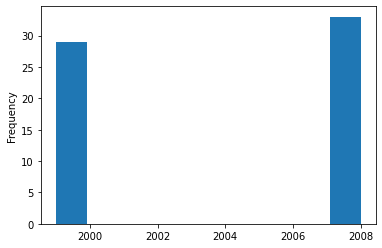

In [ ]:
mpg_11['year'].plot.hist()

### 12. 평균 복합연비가 가장 좋은 model은?

In [ ]:
# model 그룹화하고 개수와 복합연비 평균 구하여 데이터 추출
mpg_12 = mpg.groupby('model').agg(n = ('model', 'count'), 
                                  mean_total = ('total', 'mean'))
mpg_12

,n,mean_total
model,,
4runner 4wd,6,34.000000
a4,7,47.142857
a4 quattro,8,42.875000
a6 quattro,3,40.000000
altima,6,49.333333
c1500 suburban 2wd,5,30.600000
camry,7,48.142857
camry solara,7,48.000000
caravan 2wd,11,38.181818


In [ ]:
# 평균 복합연비 기준으로 내림차순 정렬
mpg_12.sort_values('mean_total', ascending = False)

,n,mean_total
model,,
corolla,5,59.600000
civic,9,57.000000
new beetle,6,56.833333
jetta,9,50.333333
altima,6,49.333333
camry,7,48.142857
camry solara,7,48.000000
gti,5,47.400000
a4,7,47.142857


답 : corolla

### 13. displ 변수 시각화 후 grade2 파생변수 만들기
* 배기량이 높은 차량은 흡입할 수 있는 공기가 많기 때문에 엔진의 크기가 크고 소비되는 연료도 많음을 의미 → 연비와 반비례 가정

In [ ]:
# displ = 배기량 개수 알아보기
mpg.groupby('displ').agg(n = ('displ', 'count'))

,n
displ,
1.6,5
1.8,14
1.9,3
2.0,21
2.2,6
2.4,13
2.5,20
2.7,8
2.8,10


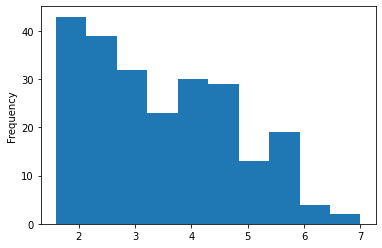

In [ ]:
mpg['displ'].plot.hist()
# 4를 기준으로 4 이하 = bad, 4 초과 = ggod

In [ ]:
# displ이 4 이상이면 bad, 4 이하면 good
mpg['grade2'] = np.where(mpg['displ'] >= 4, 'bad', 'good')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,good,good
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,good,good
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,good,good
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,good,good
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,bad,good


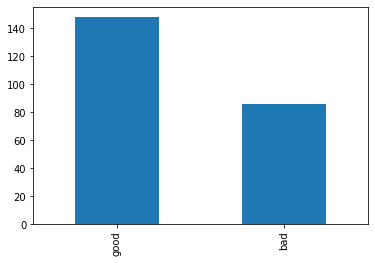

In [ ]:
# grade2 변수 시각화
grade_count2 = mpg['grade2'].value_counts()
grade_count2.plot.bar()

### 14. grade2가 good인 배기량, 복합연비 평균은?

In [ ]:
# grade2 = good인 데이터 추출
mpg_14 = mpg.query('grade2 == "good"')
mpg_14

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,good,good
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,good,good
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,good,good
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,good,good
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,bad,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47,good,good
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,50,good,good
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,42,bad,good
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,44,bad,good


In [ ]:
# 배기량 평균 구하기
mpg_14['displ'].mean()

2.6263513513513517

In [ ]:
# 복합연비 평균 구하기
mpg_14['total'].mean()

45.722972972972975

답 : 배기량 평균 = 2.63, 복합연비 평균 = 45.72

### 15. grade, grade2가 모두 good인 데이터의 개수는?

In [ ]:
# grade, grade2 = good인 데이터 추출
a = '(grade == "good") and (grade2 == "good")'
mpg_15 = mpg.query(a)
mpg_15

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,good,good
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,good,good
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,good,good
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,good,good
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,45,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,49,good,good
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,50,good,good
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,47,good,good
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47,good,good


답 : 79개

### 16. grade, grade2가 모두 good인 데이터의 평균 복합연비가 가장 좋은 자동차 제조사는?

In [ ]:
# 15번 문제와 동일한 데이터
mpg_15

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,grade,grade2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,good,good
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,good,good
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,good,good
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,good,good
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,45,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,49,good,good
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,50,good,good
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,47,good,good
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,47,good,good


In [ ]:
# 자동차 제조사별 평균 복합연비 나타내는 데이터 추출
mpg_16 = mpg_15.groupby('manufacturer').agg(mean_total = ('total', 'mean'))
mpg_16

,mean_total
manufacturer,
audi,48.285714
chevrolet,48.333333
honda,57.000000
hyundai,47.875000
nissan,49.333333
pontiac,46.000000
subaru,46.000000
toyota,53.000000
volkswagen,52.571429


In [ ]:
# 평균 복합연비 기준으로 내림차순 정렬
mpg_16.sort_values('mean_total', ascending = False)

,mean_total
manufacturer,
honda,57.000000
toyota,53.000000
volkswagen,52.571429
nissan,49.333333
chevrolet,48.333333
audi,48.285714
hyundai,47.875000
pontiac,46.000000
subaru,46.000000


답 : honda

## 인사이트 : 문제마다 데이터프레임 저장해서 따로 추출하는게 편함